# Into to Machine Learning

In this introduction to machine learning, we'll cover the basics and provide a practical overview of key concepts and tools. Here’s what you can expect:

- **`Scikit-learn`**: A brief introduction to this powerful Python library for implementing machine learning algorithms.
- **`Pandas` for Data Analysis**: Techniques for using Pandas to manipulate and analyze data.
- **Handling Categorical Values and Missing Data**: Strategies to manage and preprocess categorical values and deal with missing data in your datasets.
- **ML modeling techniques**: 
    - An introduction tp Decision Tree Regression and Random Forest
    - Model qualification technicues like **Mean Absolute Error** (MAE).
    - The train-test split technique
- **Model Validation**:
  - **Cross Validation with `cross_val_score`**

# Work with data

## Scikit-learn 
##### *to implement machine learning models and statistical modelling*
___

Scikit-learn is the most popular library for modeling the types of data typically stored in *DataFrames*.
Through scikit-learn, we can implement various machine learning models for regression, classification, clustering, and statistical tools for analyzing these models.


<div>
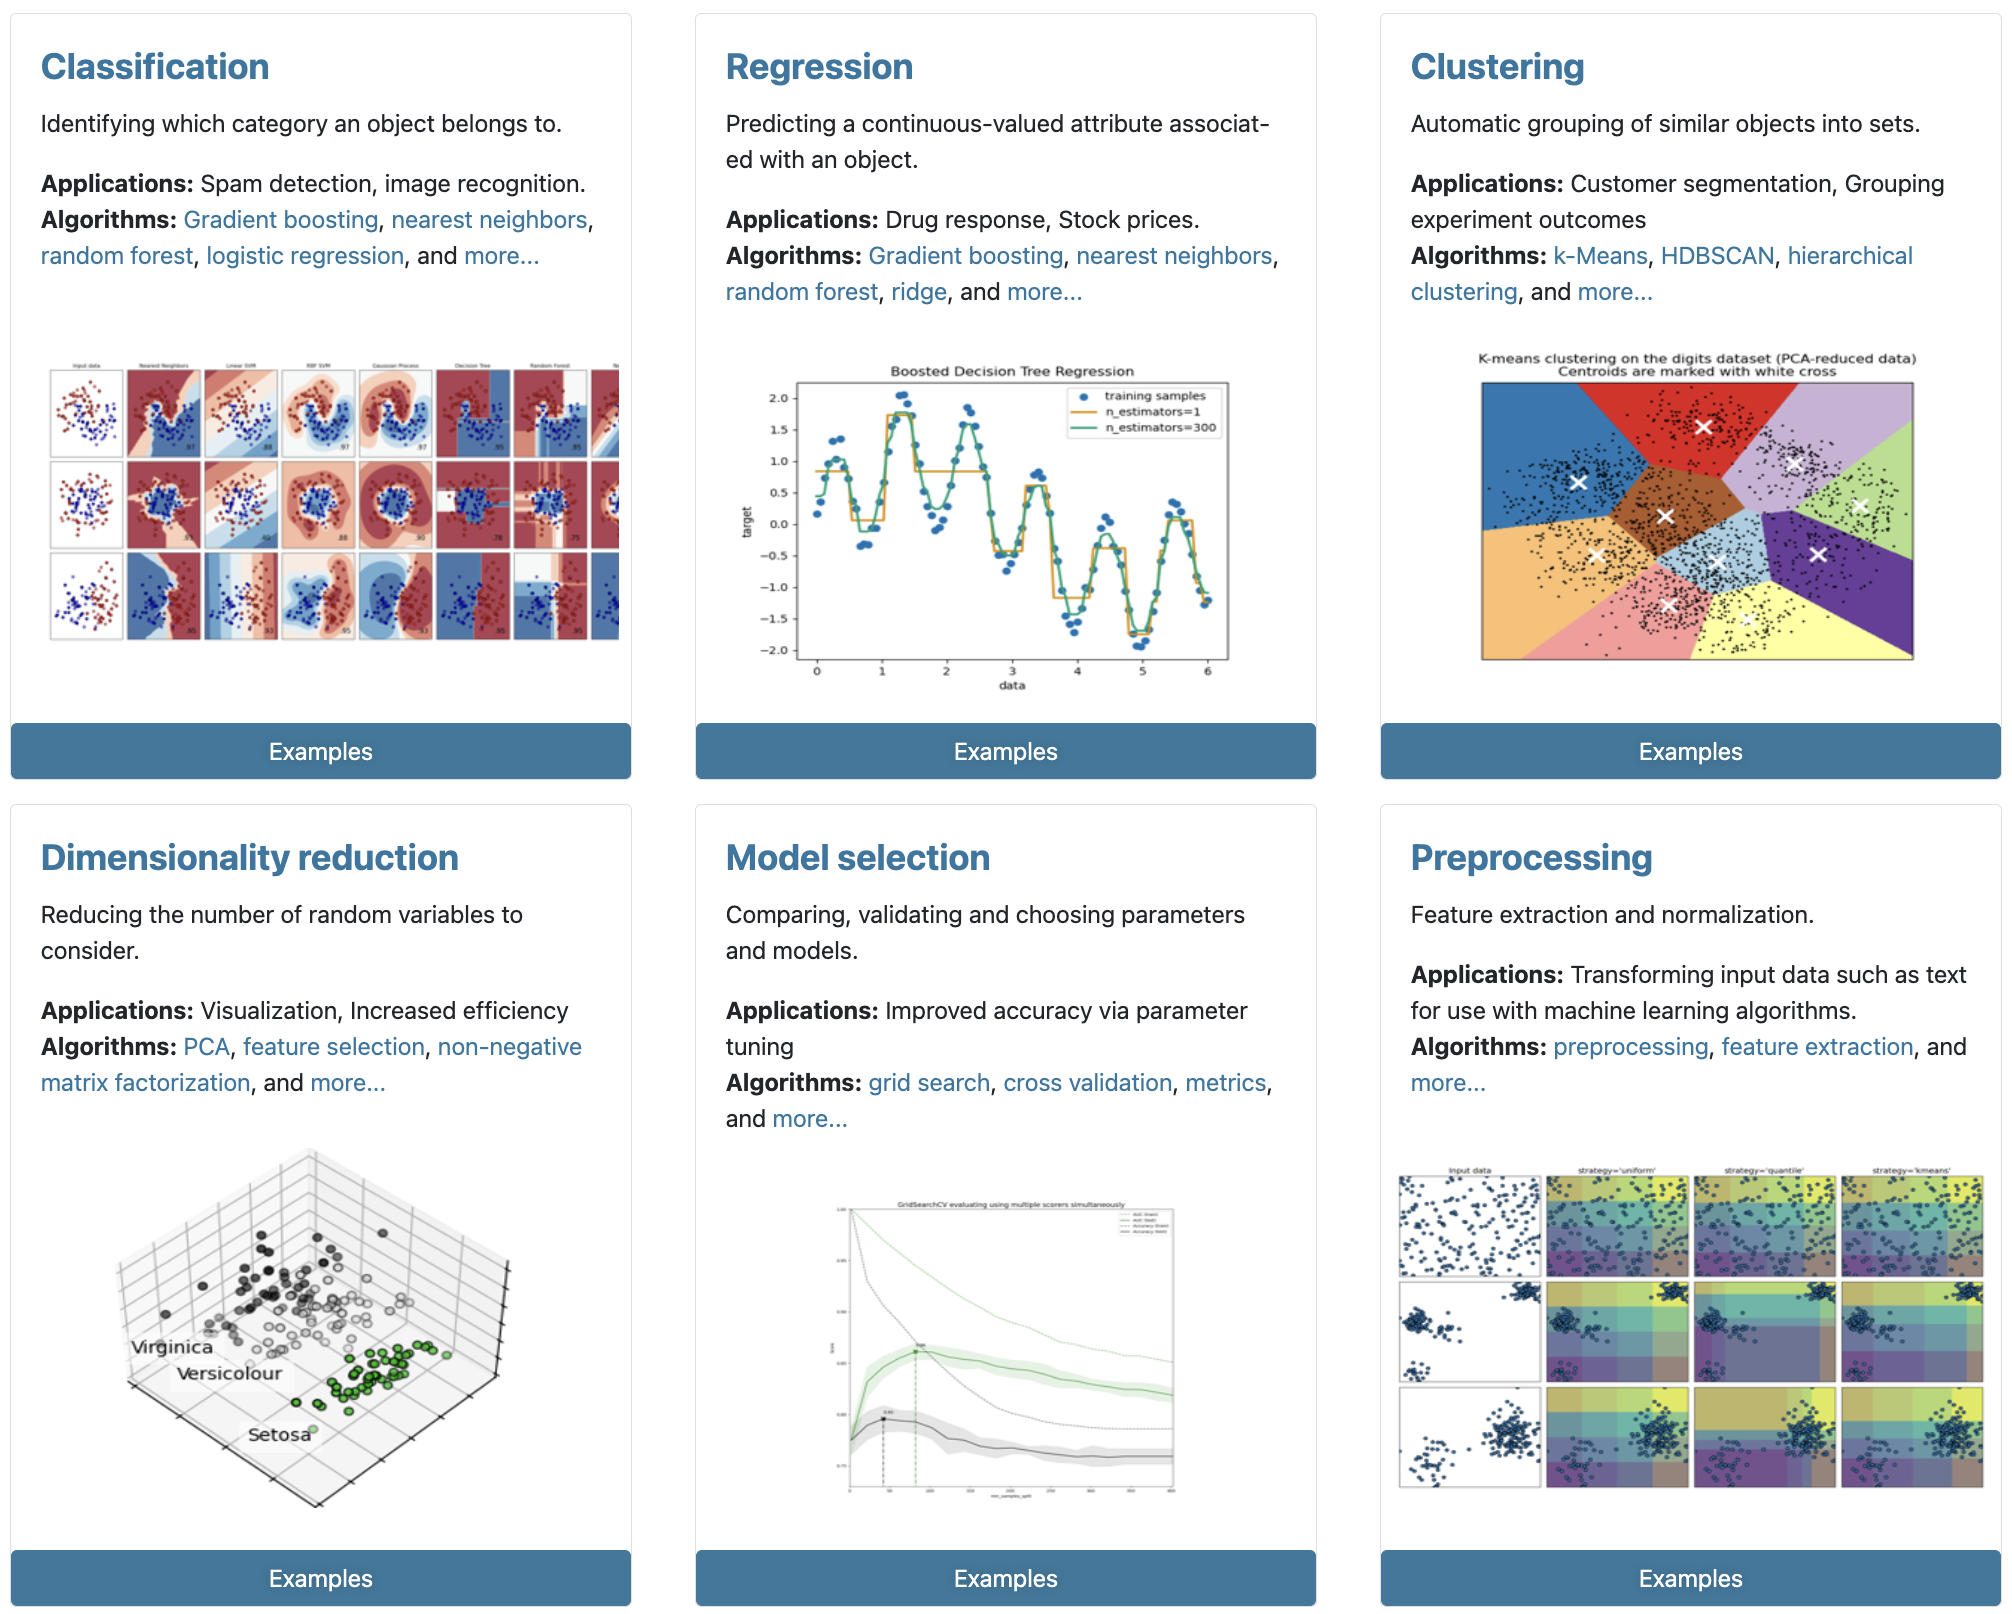
</div>


## Pandas (empty)

## XGBoost

XGBoost (Extreme Gradient Boosting) is a leading software library,  an optimized and scalable implementation of gradient boosting designed to be highly efficient, flexible, and portable. It has become one of the most popular algorithms in data science competitions and real-world applications.

**Key Points:**
- **Speed and Performance**: Highly optimized for both speed and performance.
- **Regularization**: Includes L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting.
- **Tree Pruning**: Uses a more efficient tree pruning algorithm called "depth-wise" tree growth.
- **Handling Missing Values**: Can handle missing values internally.
- **Parallel Processing**: Utilizes multiple CPU cores for faster computation.
- **Scalability**: Can handle large datasets efficiently.


## Pandas basic

In [246]:
from copy import deepcopy
import pandas as pd
from pandas import DataFrame
from time import perf_counter as pc
from utils import score_model as sm
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


def split_test_dataset(data, types='numerical'):
    df_copy = {}
    
    if types == 'all':
        df_copy = deepcopy(data)
    elif types == 'numerical':
        df_copy = deepcopy(data[data.describe().columns])
    elif types == 'categorical':
        df_copy = deepcopy(data[data.describe().columns])

    X_train = df_copy.drop(columns=['Price'])
    y_train = df_copy.Price

    return train_test_split(X_train, y_train, random_state=1)

def display_plot(x_values, y_values, xlabel: str = '', ylabel: str = '', title: str = '', label: str = 'x'):

    plt.figure(figsize=(6, 3))
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    
    plt.show()


def get_mae(train_X, val_X, train_y, val_y, with_model=DecisionTreeRegressor, random_state: int = 0, **kwargs):
    model = with_model(**kwargs, random_state=random_state)
    model.fit(train_X, train_y)
    prediction = model.predict(val_X)
    mae = mean_absolute_error(val_y, prediction)
    return mae    


def time_taken(func, *args, **kwargs):
    def wrapper(*args, **kwargs):
        t0 = pc()
        func()
        print()
        return
    return wrapper
        


df: DataFrame = pd.read_csv('./data/melb_data.csv')

df.describe()  # get summary of dataframe     
df.info
df.nunique()

IndentationError: expected an indented block after function definition on line 48 (2993137740.py, line 51)

- count: shows how many rows have non-missing values
- mean: average
- std: standard deviation, which measures how numerically spread out the values are.
  - let's say in average there are approximately 3 (2.938 plus/minus 0.956)rooms in selected dataset.

- min: smallest value
  - 25%: 25% smallest values
  - 50%: 50% smallest values
  - 75%: 75% smallest values
- max: max value,

**Pandas axis explain:**
- axis=0: Operates along rows. Use when you want to drop rows or perform row-wise operations.
- axis=1: Operates along columns. Use when you want to drop columns or perform column-wise operations.

### Values

In [3]:
print("Average Price: ", df.Price.mean())
print("Get lowest value: ", df.YearBuilt.min())
print("Sort DataFrame by YearBuilt: ", df.sort_values('YearBuilt', ascending=False)['YearBuilt'][0:3])

Average Price:  1075684.079455081
Get lowest value:  1196.0
Sort DataFrame by YearBuilt:  1234     2018.0
11136    2017.0
7060     2017.0
Name: YearBuilt, dtype: float64


### Types

In [4]:
# Types
is_num_cols = df.dtypes == 'object'
print("Show is column numerical: ", is_num_cols[:3])
print("Get only categorical columns (1): ", is_num_cols[is_num_cols == True][:3])
print("Get only categorical columns (2): ", list(is_num_cols[is_num_cols].index))


Show is column numerical:  Suburb      True
Address     True
Rooms      False
dtype: bool
Get only categorical columns (1):  Suburb     True
Address    True
Type       True
dtype: bool
Get only categorical columns (2):  ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


### Columns

In [257]:
# Columns
print("Show all columns: ", df.columns)

print("Show numerical columns (1): ", df.describe().columns)
print("Show categorical columns (2): ", df.select_dtypes(exclude=['object']))

cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]
print("Columns with missing values", cols_with_missing)
# print("Show column types: ", df[df.describe().columns].info()[0:3])

Show all columns:  Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
Show numerical columns (1):  Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')
Show categorical columns (2):         Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
0          2  1480000.0       2.5    3067.0       2.0       1.0  1.0   
1          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
2          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
3          3   850000.0       2.5    3067.0       3.0       2.0  1.0   
4          4  1600000.0       2.5    3067.0       3.0       1.0

TypeError: 'NoneType' object is not subscriptable

### Shape

In [6]:
 # Shape 
print("Show number of columns and rows: ", df.shape)
print("Show number of rows: ", df.shape[0])
print("Concatenate 2 DataFrames: ", pd.concat([df[:5], df[5:10]], axis=1)[:3])
print("Show Indexes", df[:2].index)

Show number of columns and rows:  (13580, 21)
Show number of rows:  13580
Concatenate 2 DataFrames:         Suburb          Address  Rooms Type      Price Method SellerG  \
0  Abbotsford     85 Turner St    2.0    h  1480000.0      S  Biggin   
1  Abbotsford  25 Bloomburg St    2.0    h  1035000.0      S  Biggin   
2  Abbotsford     5 Charles St    3.0    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       NaN  NaN       NaN           NaN   
1  4/02/2016       2.5    3067.0  ...       NaN  NaN       NaN           NaN   
2  4/03/2017       2.5    3067.0  ...       NaN  NaN       NaN           NaN   

   YearBuilt  CouncilArea Lattitude  Longtitude  Regionname Propertycount  
0        NaN          NaN       NaN         NaN         NaN           NaN  
1        NaN          NaN       NaN         NaN         NaN           NaN  
2        NaN          NaN       NaN         NaN         NaN  

### Missing Data

In [32]:
# Missing Data

df_copy = df.copy()
print("Returns DF with bool cells (true if exists): df.isnull()")
missing_cols = df.isnull().sum()
print("Returns a list with null count by column: \n", df.isnull().sum()[12:15])
print("Returns columns if any null: \n", missing_cols[missing_cols > 0])
print("Returns total missing records", missing_cols[missing_cols > 0].sum())
print("Drop duplicated rows: df.drop_duplicates(axis=0)", df.drop_duplicates())

# Drop rows with missing values in a column
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)

Returns DF with bool cells (true if exists): df.isnull()
Returns a list with null count by column: 
 Car               62
Landsize           0
BuildingArea    6450
dtype: int64
Returns columns if any null: 
 Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64
Returns total missing records 13256
Drop duplicated rows: df.drop_duplicates(axis=0)               Suburb           Address  Rooms Type      Price Method  \
0         Abbotsford      85 Turner St      2    h  1480000.0      S   
1         Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2         Abbotsford      5 Charles St      3    h  1465000.0     SP   
3         Abbotsford  40 Federation La      3    h   850000.0     PI   
4         Abbotsford       55a Park St      4    h  1600000.0     VB   
...              ...               ...    ...  ...        ...    ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000.0      S   
13576   Williamstown     77 Merret

NameError: name 'X_full' is not defined

## Analize your Data
### Missing Data

Missing data must be addressed for effective modeling. To handle missing data, you can use the following approaches:
1. **Drop Columns with Missing Values**.
2. **Imputation**. Put mean or mode instead of empty cells. The value can ofcourse be calculated more in a more complex way like with regression imputation, however complex strategies typically give no additional benefit once you plug the results into sophisticated machine learning models.
3. **An Extension To Imputation**: Is when you add additional column that shows the location of the imputed entries.

<img src="./public/imputation-with-extension.png" width="300"/>

#### Drop Columns with Missing Values

In [8]:
X_train, X_val, y_train, y_val = split_test_dataset(df)

# Get numerical missing columns
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]


# Drop columns in training and validation data
reduced_x_train = X_train.drop(cols_with_missing, axis=1)
reduced_x_test = X_val.drop(cols_with_missing, axis=1)


mae = sm(reduced_x_train, reduced_x_test, y_train, y_val)
print("MEA (drop missing): ", mae)


MEA (drop missing):  236180.12852233677


#### SimpleImputer
`SimpleImputer` is a class in the scikit-learn library used to handle missing data in datasets. 
It allows you to replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.

`SimpleImputer(strategy: str='mean')`
- If `mean`, then replace missing values using the mean along each column. Can only be used with numeric data.
- If `median`, then replace missing values using the median along each column. Can only be used with numeric data.
- If `most_frequent`, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.
- If `constant`, then replace missing values with fill_value. Can be used with strings or numeric data.

In [9]:
from sklearn.impute import SimpleImputer

X_train, X_val, y_train, y_val = split_test_dataset(df)

# Imputation by mean
my_imputer = SimpleImputer()
imputed_mean_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_mean_X_valid = pd.DataFrame(my_imputer.transform(X_val))

mae = sm(imputed_mean_X_train, imputed_mean_X_valid, y_train, y_val)
print("MEA (imputer mean): ", mae)


# Imputation with most frequent strategy
my_imputer_moda = SimpleImputer(strategy='most_frequent')
imputed_moda_X_train = pd.DataFrame(my_imputer_moda.fit_transform(X_train))
imputed_moda_X_valid = pd.DataFrame(my_imputer_moda.transform(X_val))


mae = sm(imputed_moda_X_train, imputed_moda_X_valid, y_train, y_val)
print("MEA (imputer moda): ", mae)

MEA (imputer mean):  232906.23946980856
MEA (imputer moda):  230113.1967599411


We see that Approach 2 has lower MAE than Approach 1, so Approach 2 performed better on this dataset.

#### An Extension to Imputation
Approach 3 imputes the missing values, while also keeping track of which values were imputed.

In [10]:
from sklearn.impute import SimpleImputer

X_train, X_val, y_train, y_val = split_test_dataset(df)

# Get numerical missing columns
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

# Add a column to indicate which values were imputed
for col in cols_with_missing:
    X_train[col + '_was_missing'] = X_train[col].isnull()
    X_val[col + '_was_missing'] = X_val[col].isnull()

# Imputation
my_imputer_plus = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer_plus.fit_transform(X_train))
imputed_X_valid_plus = pd.DataFrame(my_imputer_plus.transform(X_val))

print(imputed_X_train_plus.columns)  # RangeIndex(start=0, stop=15, step=1)

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train.columns
imputed_X_valid_plus.columns = X_val.columns

mae = sm(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_val)
print('MAE (inputer plus): ', mae)

RangeIndex(start=0, stop=15, step=1)
MAE (inputer plus):  230162.52312223858


### Categorical Variables
 
Converting categorical values to numerical values is crucial in machine learning because most ML algorithms require numerical input. During the initial data review, identify any categorical values that can be converted to numerical formats. For example:

<img src="./public/initial-data.jpeg" width="400"/>

- Gender: Can be represented as `-1` for female and `1` for male.
- Degree: Convert degrees to numerical values, where 0 represents no degree, and higher values represent higher degrees. Group similar degrees to improve the model (e.g., treat "BEcon" and "BSc" as the same).
- Postcode: Replace postcodes with latitude or another numerical representation reflecting location.

<img src="./public/processed-data.jpeg" width="400"/>


Now that we know why we need to store data numerically, let's look at three approaches to handling categorical data: 

1. **Drop Categorical Column**: very simple and straightforward approach, suitable when the categorical variable is not statistically significant.
2. **Ordinal encoding**:  assigns each unique value to a different integer. ("Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3).)
3. **One-hot encoding**: This approach transforms categorical variables into binary vectors, where each category is represented as a binary feature. For example, if a categorical variable has 3 categories, it will be transformed into 3 binary features. You can expect this approach to work particularly well if there is no clear ordering in the categorical data.

4. **TargetEncoder**: Encodes categorical features using supervised signal in a classification or regression pipeline. This encoding is typically suitable for high cardinality categorical variables.
5. **LabelEncoder**: Encodes target labels with values between 0 and ``n_classes-1``.

6. **DictVectorizer**: Performs a one-hot encoding of dictionary items (also handles string-valued features).
7. **FeatureHasher**: Performs an approximate one-hot encoding of dictionary items or strings.
8. **LabelBinarizer** : Binarizes labels in a one-vs-all fashion.
9. **MultiLabelBinarizer**: Transforms between iterable of iterables and a multilabel format, e.g. a (samples x classes) binary matrix indicating the presence of a class label.



- Use Label-encoding - Use this when, you want to preserve the ordinal nature of your feature. For example, you have a feature of education level, which has string values like "Bachelor","Master","Ph.D". In this case, you want to preserve the ordinal nature that, Ph.D > Master > Bachelor hence you'll map using label-encoding like - Bachelor-1, Master-2, Ph.D-3.
- Use One-hot encoding - Use this when, you want to treat your categorical variable with equal order. For example, you have colors variable which has values "red","yellow", "orange". Now, in this case any value has no precedence over other values, hence you'll use One hot encoding here.


#### Drop Categorical Columns

In [11]:
X_train, X_valid, y_train, y_valid = split_test_dataset(df)

drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

mae = sm(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_val)
print('MAE (drop nullable category): ', mae)

MAE (drop nullable category):  230162.52312223858


#### Ordinal encoding

``` python
class OrdinalEncoding(OneToOneFeatureMixin, _BaseEncoder(TransformerMixin, BaseEstimator)):
    def __init__(...):
    """
    Encode categorical features as an integer array.

    Parameters
    ----------
    categories : 'auto' or a list of array-like, default='auto'
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith column. 
    dtype : number type, default=np.float64, Desired dtype of output.
    
    handle_unknown : {'error', 'use_encoded_value'}, default='error'
        - 'error' raised in case an unknown categorical feature is present during transform. 
        - 'use_encoded_value', unknown encoded value will be set to the value given for the parameter `unknown_value`. 
    unknown_value : int or np.nan, default=None
    
    encoded_missing_value : int or np.nan, default=np.nan
        Encoded value of missing categories. If set to `np.nan`, then the `dtype` parameter must be a float dtype.
        
    min_frequency : int or float, default=None
        Specifies the minimum frequency below which a category will be considered infrequent.
        - `int`, categories with a smaller cardinality will be considered infrequent.
        - `float`, categories with a smaller cardinality than `min_frequency * n_samples`  will be considered infrequent.

    max_categories : int, default=None
        Specifies an upper limit to the number of output categories for each input feature when 
        considering infrequent categories. `max_categories` do **not** take into account missing or unknown categories. 
        Setting `unknown_value` or `encoded_missing_value` to int will increase the number of unique integer codes by one each.



    Methods
    --------
    - `fit` : Fit the OrdinalEncoder to X.
        X : array-like of shape (n_samples, n_features), The data to determine the categories of each feature.
        y : Ignored. for compatibility with `~sklearn.pipeline.Pipeline`

    - `transform`(X: array-like of shape) : Transform X to ordinal codes
        >>> enc.transform([['Female', 1], ['Male', 4]]).toarray()
            array([[1., 0., 1., 0., 0.],
           [0., 1., 0., 0., 0.]])
    
    - `inverse_transform`(X: array-like of shape) : Convert the data back to the original representation.
    
    - `fit_transform` (TransformerMixin) : method that delegates to `fit` and `transform`;
    - `set_params`(**kwargs) (BaseEstimator) : Set the parameters of this estimator;
        Example: >>> enc.set_params(encoded_missing_value=-1).fit_transform(X)
    """
```

In [12]:
from sklearn.preprocessing import OrdinalEncoder


X_train, X_valid, y_train, y_valid = split_test_dataset(df, types='all')

object_cols = X_train.select_dtypes(include='object').columns

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])


mae = sm(label_X_train, label_X_valid, y_train, y_valid)
print('MAE (ordinal encoder): ', mae)


MAE (ordinal encoder):  247259.28424153166


Infrequent categories are enabled by setting `max_categories` or `min_frequency`.
In the following example, "a" and "d" are considered infrequent and grouped
together into a single category, "b" and "c" are their own categories, unknown
values are encoded as 3 and missing values are encoded as 4.

``` shell
>>> X_train = np.array(
...     [["a"] * 5 + ["b"] * 20 + ["c"] * 10 + ["d"] * 3 + [np.nan]],
...     dtype=object).T
>>> enc = OrdinalEncoder(
...     handle_unknown="use_encoded_value", unknown_value=3,
...     max_categories=3, encoded_missing_value=4)
>>> _ = enc.fit(X_train)
>>> X_test = np.array([["a"], ["b"], ["c"], ["d"], ["e"], [np.nan]], dtype=object)
>>> enc.transform(X_test)
array([[2.],
       [0.],
       [1.],
       [2.],
       [3.],
       [4.]])
```

#### One-Hot Encoder

``` python
class OneHotEncoder(_BaseEncoder):
    
    # Attributes
    # ----------
    # categories_ : list of arrays
    # drop_idx_ : array of shape (n_features,)
    # infrequent_categories_ : list of ndarray
    # n_features_in_ : int
    # feature_names_in_ : ndarray of shape (`n_features_in_`,)
    # feature_name_combiner : callable or None]
    
    """
    Encode categorical features as a one-hot numeric array.

    Parameters
    ----------
    - `dtype` : number type, default=np.float64. Desired dtype of output.
    - `categories` : 'auto' or a list of array-like, default='auto' (same as OrdinalEncoder)
    - `drop` : {'first', 'if_binary'} or an array-like of shape (n_features,), default=None
        Specifies a methodology to use to drop one of the categories per feature. 
        - None : retain all features (the default).
        - 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped.
        - 'if_binary' : drop the first category in each feature with two categories. 
            Features with 1 or more than 2 categories are left intact.
        - array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.

        When `max_categories` or `min_frequency` is configured to group
        infrequent categories, the dropping behavior is handled after the
        grouping.`
    - `sparse_output` : bool, default=True
        When ``True``, it returns a :class:`scipy.sparse.csr_matrix`, i.e. a sparse matrix in "Compressed Sparse Row" (CSR) format.
    - `handle_unknown` : {'error', 'ignore', 'infrequent_if_exist'}, default='error'
        - 'error' : Raise an error if an unknown category is present during transform.
        - 'ignore' : When an unknown category is encountered during transform, will be set to zeros
        - 'infrequent_if_exist' : will map to the infrequent category if it exists. 

    - `min_frequency` : int or float, default=None (same as OrdinalEncoder)
    - `max_categories` : int, default=None (same as OrdinalEncoder)

    - `feature_name_combiner` : "concat" or callable, default="concat"
        This is used to create feature names to be returned by :meth:`get_feature_names_out`.
        - `"concat"` concatenates encoded feature name and category with `feature + "_" + str(category)`
        
        >>> enc.get_feature_names_out(['gender', 'group'])
        array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'], ...)
"""
```

<img src="./public/csr_matrix.png" width="400"/>


##### Example strategy to apply OneHotEncoder 
1. Apply one-hot encoder to each column with categorical data
2. One-hot encoding removed index; put it back
3. Remove categorical columns (will replace with one-hot encoding)
4. Add one-hot encoded columns to numerical features
5. Ensure all columns have string type


| Note: you should use OneHotEncoder on columns with low cardinality, because each column will be splited into bynary columns for each unique value.

In [13]:
from sklearn.preprocessing import OneHotEncoder

X_train, X_valid, y_train, y_valid = split_test_dataset(df, types='all')

object_cols = X_train.select_dtypes(include='object').columns

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)


mae = sm(OH_X_train, OH_X_valid, y_train, y_valid)

print('MAE (One Hot Encoder): ', mae)


MAE (One Hot Encoder):  213689.37466863033


## Pipelines

### Pipeline

Pipelines offer a straightforward method to organize your data preprocessing and modeling code. The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

### ColumnTransformer

We use ColumnTransformer class to bundle together different preprocessing steps. The code below:

- imputes missing values in numerical data, and
- imputes missing values and applies a one-hot encoding to categorical data.

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

X_train, X_valid, y_train, y_valid = split_test_dataset(df, types='all')

numerical_cols = df.drop('Price', axis=1).select_dtypes(exclude='object').columns
categorical_cols = df.drop('Price', axis=1).select_dtypes(include='object').columns

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Inint Model
model = DecisionTreeRegressor(random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

mae = sm(OH_X_train, OH_X_valid, y_train, y_valid)

print('MAE: ', mae)


MAE:  213689.37466863033


``` python
class Pipeline(_BaseComposition):
    """
    Intermediate steps of the pipeline must be 'transforms', that is, they must implement `fit` and `transform` methods.
    The final :term:`estimator` only needs to implement `fit`. The transformers in the pipeline can be cached using ``memory`` argument.

    Parameters
    ----------
    - `steps` : list of tuples (arbitray name of step, estimator), all steps must define `fit`. All non-last steps must also define `transform`.
    - `memory` : str or object with the joblib.Memory interface, default=None. Used to cache the fitted transformers of the pipeline. 
    - `verbose` : bool, default=False. If True, the time elapsed while fitting each step will be printed as it is completed.

    Attributes
    ----------
    named_steps : :class:`~sklearn.utils.Bunch` (dict-like object) read-only
    classes_ : ndarray of shape (n_classes,) The classes labels. 
    n_features_in_ : int. Number of features seen during :term:`fit`
    feature_names_in_ : ndarray of shape (`n_features_in_`,). Names of features seen during :term:`fit`.

    Examples
    --------
    >>> pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
    >>> pipe.fit(X_train, y_train).score(X_test, y_test)
    0.88
    >>> # An estimator's parameter can be set using '__' syntax
    >>> pipe.set_params(svc__C=10).fit(X_train, y_train).score(X_test, y_test)
    0.76
    """
```

``` python
class ColumnTransformer(TransformerMixin, _BaseComposition):
    """
    This estimator allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space.

    Parameters
    ----------
    - `transformers` : list of tuples (name, transformer, columns)
        - `name` : str. name that can used in ``set_params``
        - `transformer` : {'drop', 'passthrough'} or estimator (must support `fit` and `transform`)
            'drop', 'passthrough' : drop the columns or to pass them through untransformed, respectively.
        - `columns` :  str, array-like of str, int, array-like of int, array-like of bool, slice or callable
    - `remainder` : {'drop', 'passthrough'} or estimator, default='drop'. By default, non-specified columns are dropped.
    - `sparse_threshold` : float, default=0.3. density threashold for sparse matrixes.
    - `n_jobs` : int, default=None. Number of jobs to run in parallel. ``None`` means 1. ``-1`` means using all processors. 
    - `transformer_weights` : dict, default=None, Multiplicative weights for features per transformer.
    - `verbose` : bool, default=False. If True, the time elapsed while fitting each transformer will be printed as it is completed.
    - `verbose_feature_names_out` : bool, default=True
        If True, `get_feature_names_out` will prefix all feature names with the name of its transformer.
    - `force_int_remainder_cols` : bool, default=True. force "remainder" transformer to always be stored as indices (int)
```

# Modelling Techniques in ML

**Decision Tree Regression**:
- You want a simple and interpretable model that can be easily visualized.
- The dataset is relatively small and has low to moderate complexity.
- You want to understand the decision-making process of the model.
- You are not concerned about overfitting or have methods to mitigate it, such as pruning.

**Random Forest Regression**:
- You have a larger dataset with higher dimensionality.
- The dataset is noisy or contains outliers, as Random Forests are more robust to such issues.
- You are prioritizing predictive accuracy over interpretability.
- You want to reduce the risk of overfitting, as Random Forests tend to generalize better than individual decision trees.
- You want to assess feature importance or perform feature selection.

## Decsision Tree Regressor

In [96]:
from sklearn.tree import DecisionTreeRegressor


y = df.Price
X = df[['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']]

# Features
# each input xn is a D-dimensional vector of real numbers,
# which are called features, attributes, or covariates. 

print(X.describe())
print(X.head())


melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

              Rooms      Bathroom       Landsize     Lattitude    Longtitude
count  13580.000000  13580.000000   13580.000000  13580.000000  13580.000000
mean       2.937997      1.534242     558.416127    -37.809203    144.995216
std        0.955748      0.691712    3990.669241      0.079260      0.103916
min        1.000000      0.000000       0.000000    -38.182550    144.431810
25%        2.000000      1.000000     177.000000    -37.856822    144.929600
50%        3.000000      1.000000     440.000000    -37.802355    145.000100
75%        3.000000      2.000000     651.000000    -37.756400    145.058305
max       10.000000      8.000000  433014.000000    -37.408530    145.526350
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
0      2       1.0     202.0   -37.7996    144.9984
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
3      3       2.0      94.0   -37.7969    144.9969
4      4       1.0     120.0   -37.8072    144.

DecisionTreeRegressor(random_state=1)

**melbourne_model.fit(X, y)**: fits (trains) the decision tree model on the training data, where X is the feature matrix and y is the target vector. The model learns to predict housing prices (y) based on the features (X).

After executing this code, melbourne_model will be a trained decision tree regression model capable of making predictions on new data. You can then use this model to predict housing prices for new instances or evaluate its performance using appropriate metrics.

In [97]:
print("Making predictions for the following 5 houses:")
print("Model Prediction:\n", melbourne_model.predict(X.head()))
print("Actual Prices: \n", list(df.Price.head()))

Making predictions for the following 5 houses:
Model Prediction:
 [1480000. 1035000. 1465000.  850000. 1600000.]
Actual Prices: 
 [1480000.0, 1035000.0, 1465000.0, 850000.0, 1600000.0]


Sure, the model prediction is accurate, since we feed it with the data from initial dataset. Let's next review how we can validate our model and test it. 

## MAE
There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). Example of MAE would be if a house cost $150,000 and you predicted it would cost $100,000 the MAE is $50,000.

Here is how we can Calculate the MAE:

In [98]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices_head = melbourne_model.predict(X.head())
print("MAE of head of dataset")
print(mean_absolute_error(df.Price.head(), predicted_home_prices_head))

print("MAE of entier dataset")
predicted_home_prices = melbourne_model.predict(X)
print(mean_absolute_error(y, predicted_home_prices))

MAE of head of dataset
0.0
MAE of entier dataset
1125.1804614629357


The measure we just computed called an "in-sample" score. We used a single "sample" of houses for both building the model and evaluating it. 

The dataset could have erroneous patterns and model could learn on it. When you provide peace from training data for validation it may not be accurate.

## Split Testing
The scikit-learn library has a function `train_test_split` to break up the data into two pieces. We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.

In [227]:
from sklearn.model_selection import train_test_split

"""Split arrays or matrices into random train and test subsets.
    Parameters
    ----------
    *arrays: sequence of indexables with same length / shape[0]
    test_size : float | int, default=None
        If float (form 0.0 to 1.0) represent the proportion of the split
        If int, represents the absolute number of test samples. 
        If None, the value is set equally. If ``train_size``== None test_size=0.25
    train_size: float or int, default=None, The same as test_size, but represents train size,
    random_state: int | None: Controls the shuffling applied to the data before applying the split.
    shuffle: bool, default=True, Whether or not to shuffle the data before splitting.
    stratify: array-like, default=None, If not None, data is split in a stratified fashion, using 
        this asthe class labels
        
    Returns
    -------
    splitting : list, length=2 * len(arrays)
"""
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1)

# here we define our model based on test data.
melbourne_model = DecisionTreeRegressor(random_state=0)
melbourne_model.fit(X_train, y_train)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(X_val)  # type numpy.ndarray
print(type(val_predictions))
print("MAE:", mean_absolute_error(y_val, val_predictions))
print("Average Price:", df.Price.mean())

<class 'numpy.ndarray'>
MAE: 236062.79326215023
Average Price: 1075684.079455081


Now we know that actually our model is not perfectly accurate, the MAE is quite high of ~25% percent

## Underfitting and Overfitting
Improving the model by examining right fit of node leafs, and avoiding underfitting and overfitting, 

<img src="./public/overfitting-lowerfitting.jpeg" width="300"/>

There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

**Overfitting**: leads to capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
**Underfitting**: leads to failing to capture relevant patterns, again leading to less accurate predictions.


### n_estimators
`n_estimators` specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.


Let's now create a function to compare the accuracy of models built with different values for max_leaf_nodes.


In [229]:
max_leaf_nodes = [5, 50, 100, 500, 1000, 10000, 15000, 50000]
mae = []
for max_leaf_node in max_leaf_nodes:
    res = get_mae(X_train, X_val, y_train, y_val, DecisionTreeRegressor, max_leaf_nodes=max_leaf_node)
    mae.append(res)
    print(f"{max_leaf_node=} | MAE: {res}")

max_leaf_node=5 | MAE: 362073.0763217336
max_leaf_node=50 | MAE: 248168.14252005538
max_leaf_node=100 | MAE: 235952.39356577813
max_leaf_node=500 | MAE: 217160.91968735345
max_leaf_node=1000 | MAE: 216471.22424428776
max_leaf_node=10000 | MAE: 235642.31514517145
max_leaf_node=15000 | MAE: 235834.19624447718
max_leaf_node=50000 | MAE: 235834.19624447718


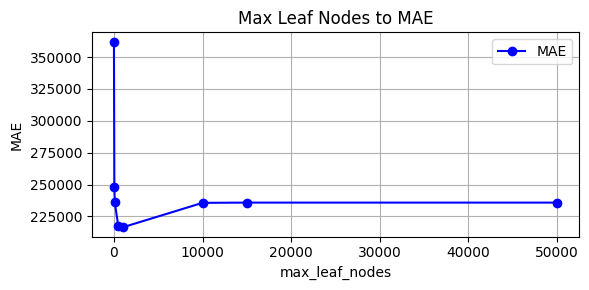

In [230]:
display_plot(max_leaf_nodes, mae, 'max_leaf_nodes', 'MAE', 'Max Leaf Nodes to MAE', 'MAE')

The optimal max leaf nodes for the current model is 500. That is sligtly better then when we do not specify the max_leaf_nodes in this case. That is becouse when max_leaf_nodes is set to None, the max_leaf_nodes will be defined dynamically, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples, so it may not be too low or too hight, but still it does not guarantie the best fit.

## Random Forest

In [231]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model with RandomForestRegressor
random_fores_model = RandomForestRegressor(random_state=0)
random_fores_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [232]:
# Calculate origin MAE
random_fores_prediction = random_fores_model.predict(X_val)
mean_absolute_error(y_val, random_fores_prediction)

167450.86305159898

In [236]:
import matplotlib.pyplot as plt


max_leaf_nodes = [5, 50, 100, 500, 1000, 10000, 15000, 50000]
mae = []

for max_leaf_node in max_leaf_nodes:
    res = get_mae(X_train, X_val, y_train, y_val, RandomForestRegressor, max_leaf_nodes=max_leaf_node)
    mae.append(res)
    print(f"{max_leaf_node=} | MAE: {res}")

max_leaf_node=5 | MAE: 357688.98486101173
max_leaf_node=50 | MAE: 227941.4450581445
max_leaf_node=100 | MAE: 209162.80711926855
max_leaf_node=500 | MAE: 177130.53972395725
max_leaf_node=1000 | MAE: 170520.94773357958
max_leaf_node=10000 | MAE: 166525.01163510766
max_leaf_node=15000 | MAE: 166525.01163510766
max_leaf_node=50000 | MAE: 166525.01163510766
max_leaf_node=100000 | MAE: 166525.01163510766


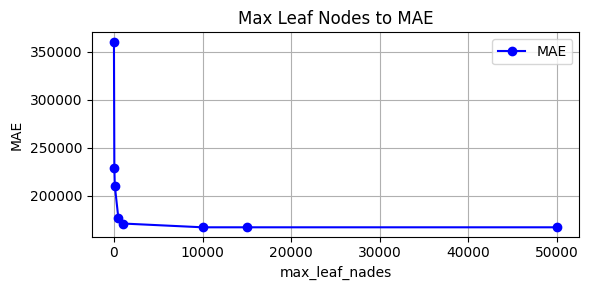

In [234]:
display_plot(max_leaf_nodes, mae, 'max_leaf_nades', 'MAE', 'Max Leaf Nodes to MAE', 'MAE')

## XGRegression 

XGRegression is regression model using the XGBoost algorithm. XGBoost (eXtreme Gradient Boosting) is a popular and powerful machine learning algorithm known for its efficiency and effectiveness in regression and classification tasks. 



In [238]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_valid, y_train, y_valid = split_test_dataset(df)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error

predictions = xgb_model.predict(X_valid)
print("MAE (XGB): " + str(mean_absolute_error(predictions, y_valid)))


MAE (XGB): 169922.12623803387


In [245]:
from time import perf_counter as pc
n_estimators = [1, 5, 10, 50, 100, 250, 500, 
                1000, 5000, 10_000]  # too slow
mae = []

for n_estimator in n_estimators:
    t0 = pc()
    res = get_mae(X_train, X_val, y_train, y_val, XGBRegressor, n_estimators=n_estimator)
    mae.append(res)
    print(f"{n_estimator=} | MAE: {res} | Finished in: {pc() - t0}")

n_estimator=1 | MAE: 368306.18703976437 | Finished in: 0.026956916000926867
n_estimator=5 | MAE: 228468.98331645803 | Finished in: 0.04006541700073285
n_estimator=10 | MAE: 192076.1508537371 | Finished in: 0.05920120800146833
n_estimator=50 | MAE: 173457.5948689479 | Finished in: 0.113847499997064
n_estimator=100 | MAE: 171387.61122169552 | Finished in: 0.19779862499854062
n_estimator=250 | MAE: 172089.12604128313 | Finished in: 0.46792799999821
n_estimator=500 | MAE: 174111.51476205818 | Finished in: 0.9181699999971897
n_estimator=1000 | MAE: 175800.60210327688 | Finished in: 1.8595714580005733
n_estimator=5000 | MAE: 176441.10657331554 | Finished in: 9.261073374997068
n_estimator=10000 | MAE: 176441.87013013163 | Finished in: 19.610384084000543


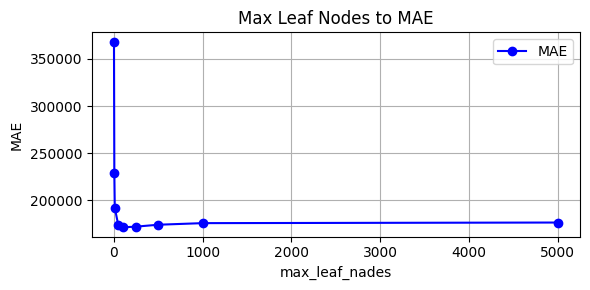

In [243]:
display_plot(n_estimators, mae, 'max_leaf_nades', 'MAE', 'Max Leaf Nodes to MAE', 'MAE')

# Model Validation
## Cross-Validation
Cross-validation is a statistical method used to evaluate the performance of a machine learning model and ensure its generalizability to an independent dataset. It involves dividing the data into subsets, training the model on some subsets, and validating it on the remaining subsets. 


<img src="./public/cross-validation.png" width="400"/>


**When should I use Cross-Validation**:
- For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.
- For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

> There's no simple threshold for what constitutes a large vs. small dataset. But **if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation**.


**See also:**
- `cross_validate` : To run cross-validation on multiple metrics and also to return train scores, fit times and score times.
- `cross_val_predict` : Get predictions from each split of cross-validation for diagnostic purposes.
- `sklearn.metrics.make_scorer` : Make a scorer from a performance metric or loss function.

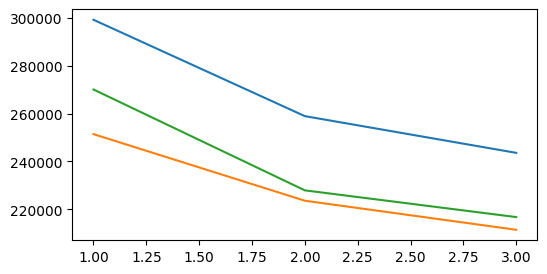

MAE scores:
 {1: array([299202.00309256, 251423.3727266 , 270069.05368979]), 2: array([258943.46896399, 223602.59163537, 227930.68261158]), 3: array([243603.99651123, 211458.36791596, 216763.22065105])}


In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df.select_dtypes(exclude='object').drop('Price', axis=1)
y = df.Price

def cross_validate_random_forest(n_estimators, X, y, cv=3):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])

    # Multiply by -1 since sklearn calculates *negative* MAE
    scores = -1 * cross_val_score(
        my_pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error'
    )

    return scores


results = {n_estimators: cross_validate_random_forest(n_estimators, X, y) for n_estimators in range(1, 4)}


import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 3))
plt.plot(list(results.keys()), list(results.values()))
plt.show()

print("MAE scores:\n", results)

``` python
def cross_val_score(...):
    """Evaluate a score by cross-validation.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
    y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None

    groups : array-like, default=None. Group labels used while splitting the dataset 
    scoring : str or callable, default=None. If str see doc, if callable(estimator, X, y) => single val 
    cv : int, cross-validation generator or an iterable, default=None. Defines splitting strategy.
        - `None`, to use the default 5-fold cross validation,
        - int, to specify the number of folds in a `(Stratified)KFold`,
        - :term:`CV splitter`,
        - An iterable that generates (train, test) splits as arrays of indices.
    n_jobs : int, default=None. Number of jobs to run in parallel. If ``None`` => 1, if -1 => all
    verbose : int, default=0. The verbosity level.
    fit_params : dict, default=None. ``params`` to pass to the fit method of the estimator.
    params : dict, default=None. Params to pass to the underlying estimator's ``fit``, the scorer, and the CV splitter.

    pre_dispatch : int or str, default='2*n_jobs'. Controls the number of jobs that get dispatched during parallel.
    error_score : 'raise' or numeric, default=np.nan. Value of the score if an error occurs in estimator fitting.
        - If set to 'raise', the error is raised.
        - If a numeric value is given, FitFailedWarning is raised.
    Returns
    -------
    scores : ndarray of float of shape=(len(list(cv)),)
    """
```

## Metrics and Scoring
https://scikit-learn.org/stable/modules/model_evaluation.html

Sensitivity to Large Errors: MSE penalizes larger errors more than smaller ones due to the squaring term. This property makes MSE particularly useful when it’s crucial to avoid large errors in predictions.

# Boost your Model

## Gradient Descent
Gradient Descent is an optimization algorithm used to minimize the cost function (or loss function) in machine learning and statistical modeling. It iteratively adjusts the model parameters (weights and biases) to reduce the error between the predicted and actual outputs.

**Key Points:**
- **Process:** 
    - Compute the gradient (partial derivatives) of the cost function with respect to each parameter.
    - Update each parameter in the opposite direction of the gradient by a step size determined by the learning rate.
- **Learning Rate:** Determines the size of the steps taken towards the minimum.
- **Variants:**
    - Batch Gradient Descent: Uses the entire dataset to compute gradients.
    - Stochastic Gradient Descent (SGD): Uses one data point at a time.
    - Mini-Batch Gradient Descent: Uses a subset of data points (mini-batch).
 
**Example:**  
Suppose we're using gradient descent to train a simple linear regression model to predict house prices based on size.

**Input**:  
Features (X): House sizes.  
Target Values (y): House prices.  
Initial Parameters: Start with random values for the slope (m) and intercept (b).  
Learning Rate: Set a small value like 0.01.  

**Process**:
- Compute the predicted prices using the initial parameters.
- Calculate the cost (mean squared error between predicted and actual prices).
- Compute the gradients (derivatives of the cost with respect to m and b).
- Update m and b by moving them in the direction of the negative gradients.
- Repeat until the cost function converges.

**Output**:
Optimized Parameters: Final values of m and b that minimize the cost function.
Trained Model: A linear regression model that best fits the data.

<<<<<<<<<

## Gradient Boosting
Gradient Boosting is a machine learning technique **for regression and classification problems**. It builds models in a stage-wise fashion and generalizes them by allowing optimization of an arbitrary differentiable loss function.

**Key Points:**
- **Objective:**
    - Build a strong predictive model by combining the predictions of several weak models (usually decision trees).
- **Process:**
    - Start with an initial model (e.g., a simple decision tree).
    - Compute the residual errors of the model.
    - Fit a new model to these residuals and add it to the ensemble.
    - Repeat the process for a specified number of iterations or until convergence.
- **Loss Function:** Guides the optimization and can be customized.

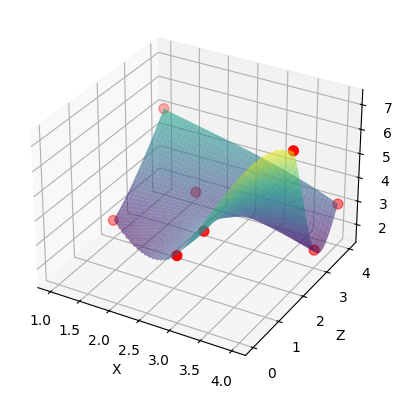

In [256]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Coordinates
points = np.array([
    [1, 2, 2],
    [4, 4, 3],
    [3, 0, 4],
    [4, 2, 7],
    [1, 4, 5],
    [2, 3, 3],
    [3, 1, 4],
    [4, 3, 2]
])

x = points[:, 0]
z = points[:, 1]
y = points[:, 2]

# Define grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate
grid_y = griddata((x, z), y, (grid_x, grid_z), method='cubic')

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot
ax.plot_surface(grid_x, grid_z, grid_y, cmap='viridis', alpha=0.6)

# Scatter plot of the original points
ax.scatter(x, z, y, color='r', s=50)

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')

plt.show()
